In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import path & CSV

In [2]:
csv_path = "../data/raw/dayahead_2025_11.csv"

df = pd.read_csv(
    csv_path,
    sep=",",                      # default for Energy-Charts CSV
    decimal=".",                  # decimal separator
    parse_dates=["Datum (MEZ)"],  # parse timestamp column as datetime
)

df.head()

,Datum (MEZ),Nicht Erneuerbar,Erneuerbar,Day Ahead Auktion
0,2025-11-01 00:00:00+01:00,10393.683090,31533.25095,63.50
1,2025-11-01 00:15:00+01:00,10168.965780,31700.09675,53.67
2,2025-11-01 00:30:00+01:00,10171.741890,31240.41741,52.37
3,2025-11-01 00:45:00+01:00,10097.763660,31064.37207,49.29
4,2025-11-01 01:00:00+01:00,9785.183986,30785.97746,52.32


## Check columns

In [3]:
df.columns.tolist()

['Datum (MEZ)', 'Nicht Erneuerbar', 'Erneuerbar', 'Day Ahead Auktion']

## Set index & keep only relevant columns

In [4]:
df = df.set_index("Datum (MEZ)")

# Keep only the price column (optional)
prices_15min = df["Day Ahead Auktion"].astype(float)

prices_15min.head()

Datum (MEZ)
2025-11-01 00:00:00+01:00    63.50
2025-11-01 00:15:00+01:00    53.67
2025-11-01 00:30:00+01:00    52.37
2025-11-01 00:45:00+01:00    49.29
2025-11-01 01:00:00+01:00    52.32
Name: Day Ahead Auktion, dtype: float64

## Plotting 15-minute prices

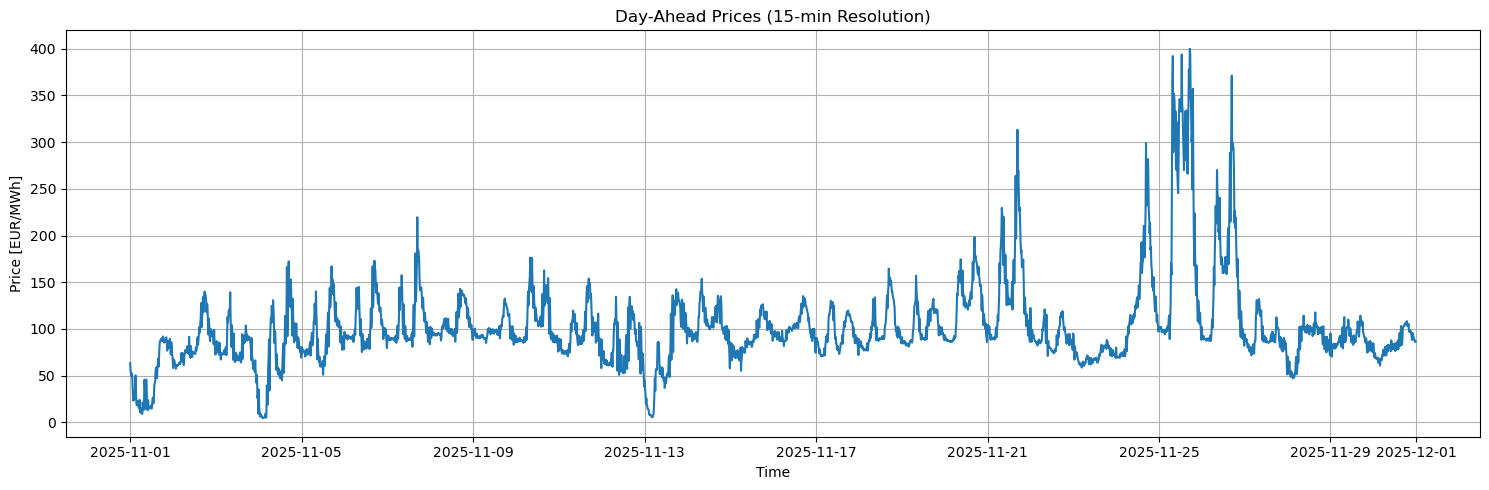

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(prices_15min)
plt.title("Day-Ahead Prices (15-min Resolution)")
plt.ylabel("Price [EUR/MWh]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

## Aggregate to 1 hour

In [6]:
prices_1h = prices_15min.resample("1h").mean()

prices_1h.head(), prices_1h.shape

(Datum (MEZ)
 2025-11-01 00:00:00+01:00    54.7075
 2025-11-01 01:00:00+01:00    38.1150
 2025-11-01 02:00:00+01:00    28.2725
 2025-11-01 03:00:00+01:00    29.9575
 2025-11-01 04:00:00+01:00    19.9025
 Freq: h, Name: Day Ahead Auktion, dtype: float64,
 (720,))

## Plotting hourly prices

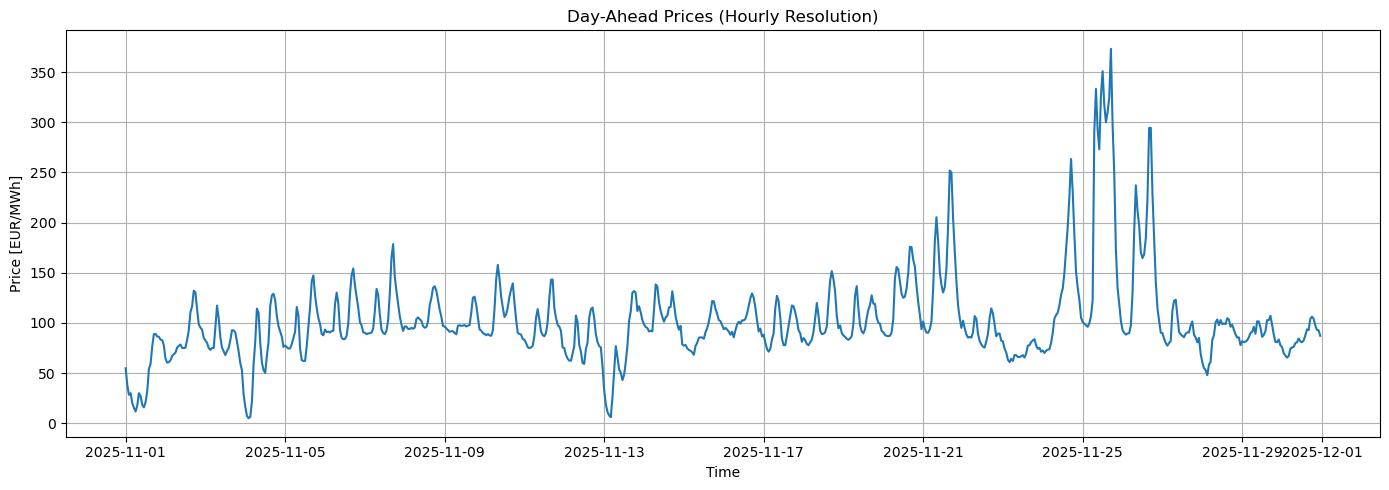

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(prices_1h)
plt.title("Day-Ahead Prices (Hourly Resolution)")
plt.ylabel("Price [EUR/MWh]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()